In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
advanced = pd.read_csv("nba_2020_advanced.csv")
pergame = pd.read_csv("nba_2020_per_game.csv")
shooting = pd.read_csv("nba_2020_shooting.csv")

In [4]:
pergame = pergame.assign(FPPG=lambda x: (x['PTS'] + 2*x['AST'] + 1.5*x['TRB'] + x['3P'] + -2*x['TOV'] + 3*x['STL'] + 3*x['BLK']))

In [5]:
pergame[['Player', 'PTS', 'TRB', '3P', 'TOV', 'STL', 'BLK', 'FPPG']].sort_values('FPPG', ascending=False)

,Player,PTS,TRB,3P,TOV,STL,BLK,FPPG
257,James Harden,34.3,6.6,4.4,4.5,1.8,0.9,62.70
12,Giannis Antetokounmpo,29.5,13.6,1.4,3.7,1.0,1.0,61.10
177,Luka Dončić,28.8,9.4,2.8,4.3,1.0,0.2,58.30
319,LeBron James,25.3,7.8,2.2,3.9,1.2,0.5,56.90
376,Damian Lillard,30.0,4.3,4.1,2.9,1.1,0.3,54.95
...,...,...,...,...,...,...,...,...
524,Isaiah Roby,0.0,0.7,0.0,0.3,0.0,0.0,0.45
386,J.P. Macura,0.0,0.0,0.0,0.0,0.0,0.0,0.00
198,Jacob Evans,0.0,0.0,0.0,0.0,0.0,0.0,0.00
454,Malik Newman,2.0,0.0,0.0,1.0,0.0,0.0,0.00


-----
Question 1: Who are the top 5 fantasy basketball players of the 2019-20 season?
-----

In [6]:
pergame_sorted = pergame.sort_values('FPPG', ascending=False)
print("The top 5 fantasy basketball players of 2019-20:\n", pergame_sorted[['Player', 'FPPG']][:5])

The top 5 fantasy basketball players of 2019-20:
                     Player   FPPG
257           James Harden  62.70
12   Giannis Antetokounmpo  61.10
177            Luka Dončić  58.30
319           LeBron James  56.90
376         Damian Lillard  54.95


-----
Question 2: Who are the top 5 fantasy players who come off the bench for their team?
-----

In [7]:
# FANTASY TOP 5 BENCH PLAYER OF THE YEAR
pergame_sorted = pergame_sorted.assign(START=lambda x: (x['GS']/x['G']))

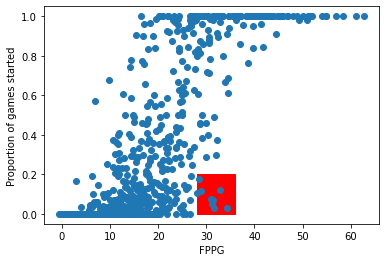

In [8]:
plt.scatter(pergame_sorted['FPPG'], pergame_sorted['START'], zorder=2)
plt.xlabel('FPPG')
plt.ylabel('Proportion of games started')
rectangle = plt.Rectangle((28,0), 8, 0.2, fc='red', ec="red")
plt.gca().add_patch(rectangle)

In [9]:
# As seen from the plot above, the highest performing fantasy bench players fall in the red rectangle, which 
# represents the 9 players that scored above 28 FPPG but started 20% or less of their games.
# Let's find them:
best_off_bench = pergame_sorted[pergame_sorted['FPPG'] > 28]
best_off_bench = best_off_bench[best_off_bench['START'] < 0.2]
best_off_bench

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FPPG,START
262,Montrezl Harrell,C,26,LAC,63,2,27.8,7.5,12.9,0.580,...,4.5,7.1,1.7,0.6,1.1,1.7,2.3,18.6,34.35,0.031746
633,Lou Williams,SG,33,LAC,65,8,28.7,6.0,14.4,0.418,...,2.6,3.1,5.6,0.7,0.2,2.8,1.2,18.2,32.85,0.123077
539,Dennis Schröder,PG,26,OKC,65,2,30.8,7.0,14.8,0.469,...,3.3,3.6,4.0,0.7,0.2,2.6,2.2,18.9,31.70,0.030769
328,James Johnson,PF,32,MIN,14,1,24.1,4.6,9.1,0.500,...,3.5,4.7,3.8,1.4,1.4,2.4,3.3,12.0,31.45,0.071429
182,Goran Dragić,PG,33,MIA,59,3,28.2,5.4,12.3,0.441,...,2.7,3.2,5.1,0.7,0.2,2.4,2.1,16.2,31.20,0.050847
52,Dāvis Bertāns,PF,27,WAS,54,4,29.3,4.9,11.3,0.434,...,3.9,4.5,1.7,0.7,0.6,1.1,2.6,15.4,30.95,0.074074
523,Mitchell Robinson,C,21,NYK,61,7,23.1,4.1,5.6,0.742,...,4.0,7.0,0.6,0.9,2.0,0.6,3.2,9.7,28.90,0.114754
449,Larry Nance Jr.,C,27,CLE,56,10,26.3,4.1,7.7,0.531,...,5.4,7.3,2.2,1.0,0.4,1.1,1.6,10.1,28.45,0.178571
338,DeAndre Jordan,C,31,BRK,56,6,22.0,3.4,5.1,0.666,...,7.5,10.0,1.9,0.3,0.9,1.3,2.0,8.3,28.10,0.107143


In [10]:
print("Top 9 fantasy basketball players coming off the bench of 2019-20:\n", 
      best_off_bench['Player'])

Top 9 fantasy basketball players coming off the bench of 2019-20:
 262     Montrezl Harrell
633         Lou Williams
539      Dennis Schröder
328        James Johnson
182         Goran Dragić
52         Dāvis Bertāns
523    Mitchell Robinson
449      Larry Nance Jr.
338       DeAndre Jordan
Name: Player, dtype: object


-----
Question 3: Who are the 5 lowest producing fantasy players that start for their team?
-----

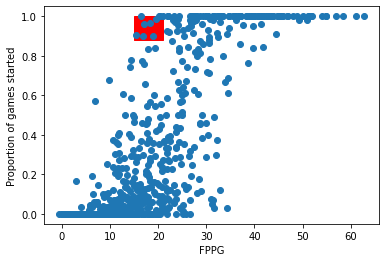

In [11]:
plt.scatter(pergame_sorted['FPPG'], pergame_sorted['START'], zorder=2)
plt.xlabel('FPPG')
plt.ylabel('Proportion of games started')
rectangle = plt.Rectangle((15,0.88), 6, 0.12, fc='red', ec="red")
plt.gca().add_patch(rectangle)

In [12]:
# As seen from the plot above, the lowest performing fantasy starting players fall in the red rectangle, which 
# represents the 10 players that scored below 17 FPPG but started 90% or more of their games.
# Let's find them:
worst_starters = pergame_sorted[pergame_sorted['FPPG'] < 21]
worst_starters = worst_starters[worst_starters['START'] > 0.88]
worst_starters

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FPPG,START
240,Danny Green,SG,32,LAL,68,68,24.8,2.9,7.0,0.416,...,2.6,3.3,1.3,1.3,0.5,0.9,2.0,8.0,20.95,1.000000
138,Zach Collins,PF,22,POR,11,11,26.4,2.9,6.2,0.471,...,4.0,6.3,1.5,0.5,0.5,1.3,3.3,7.0,20.45,1.000000
406,JaVale McGee,C,32,LAL,68,68,16.6,2.9,4.5,0.637,...,3.9,5.7,0.5,0.5,1.4,0.8,2.3,6.6,20.25,1.000000
209,Bryn Forbes,SG,26,SAS,63,62,25.1,3.8,9.2,0.417,...,1.8,2.0,1.7,0.5,0.0,0.9,1.8,11.2,19.60,0.984127
194,James Ennis,SF,29,ORL,20,18,24.5,3.0,6.7,0.451,...,3.6,4.8,1.1,0.6,0.4,1.4,2.6,8.5,19.00,0.900000
556,Tony Snell,SF,28,DET,59,57,27.8,2.9,6.5,0.445,...,1.7,1.9,2.2,0.5,0.3,0.5,1.7,8.0,18.35,0.966102
374,Meyers Leonard,C,27,MIA,51,49,20.3,2.3,4.6,0.509,...,4.5,5.1,1.1,0.3,0.3,0.8,2.1,6.1,17.15,0.960784
72,Avery Bradley,SG,29,LAL,49,44,24.2,3.5,7.8,0.444,...,2.0,2.3,1.3,0.9,0.1,1.0,2.2,8.6,16.95,0.897959
399,Wesley Matthews,SG,33,MIL,67,67,24.4,2.5,6.3,0.396,...,2.1,2.5,1.4,0.6,0.1,0.6,1.5,7.4,16.45,1.000000
226,Taj Gibson,C,34,NYK,62,56,16.5,2.7,4.6,0.584,...,2.5,4.3,0.8,0.4,0.5,0.8,2.0,6.1,15.35,0.903226


In [13]:
print("Top 10 worst fantasy starters of 2019-20:\n", worst_starters['Player'])

Top 10 worst fantasy starters of 2019-20:
 240        Danny Green
138       Zach Collins
406       JaVale McGee
209        Bryn Forbes
194        James Ennis
556         Tony Snell
374     Meyers Leonard
72       Avery Bradley
399    Wesley Matthews
226         Taj Gibson
Name: Player, dtype: object


-----
Question 4: Which 5 NBA teams are the least balanced? Who are their starters?
-----

In [47]:
team_averages = pergame_sorted.groupby('Tm', as_index=False).head([5]).groupby('Tm', as_index=False).std().sort_values('FPPG', ascending=False)
team_averages # now shows the standard deviation of the top 5 players for each team

,Tm,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FPPG,START
13,LAL,5.029911,8.203658,32.928711,7.481110,3.235274,6.690441,0.124570,0.798749,2.300000,...,1.989221,2.566515,3.815364,0.465833,0.896103,1.067708,0.750333,9.352967,18.323994,0.505932
6,DAL,2.949576,26.225941,27.175356,3.651438,2.393324,5.178127,0.019501,0.550454,1.938298,...,2.877151,3.463813,3.049918,0.234521,0.810555,1.419507,0.667083,7.632824,15.040030,0.373758
10,HOU,2.588436,19.018412,18.063776,2.493391,3.228777,7.039318,0.091998,1.651666,4.606300,...,2.243435,3.535534,3.247307,0.414729,0.801873,1.771158,0.589915,10.643073,14.395034,0.075610
16,MIL,3.361547,2.915476,17.469974,2.969007,2.971195,4.742573,0.045409,0.482701,0.895545,...,3.292871,3.881752,1.843095,0.219089,0.934345,1.043072,0.511859,8.081770,14.173496,0.278239
0,ATL,3.781534,20.129580,20.603398,4.988687,2.518531,4.721546,0.077640,1.073313,2.588049,...,1.817966,2.583215,3.479511,0.192354,0.669328,1.483914,0.874643,8.451627,10.862700,0.124105
7,DEN,4.764452,9.316652,18.201648,3.927213,1.577340,3.130016,0.030744,0.402492,1.255787,...,1.913897,2.449081,2.384953,0.200000,0.181659,0.852643,0.554076,3.739920,9.876842,0.290585
12,LAC,2.701851,7.362065,25.865034,2.276620,2.366009,4.867032,0.065683,1.192896,2.782625,...,1.305756,1.651666,1.484251,0.496991,0.336155,0.659545,0.689202,6.987346,9.565825,0.502844
30,WAS,4.037326,8.706320,20.911719,4.297906,2.437622,5.636311,0.059517,1.461848,3.543586,...,0.917606,1.594679,2.088780,0.258844,0.343511,0.991464,0.357771,7.878134,9.451812,0.415592
8,DET,3.271085,16.946976,14.889594,3.488266,1.177710,1.043072,0.073286,1.035857,2.652734,...,3.863548,5.622544,1.177710,0.669328,0.658027,0.846759,1.018332,1.437707,9.254958,0.289679
24,POR,3.646917,25.984611,25.353501,3.208894,1.566206,4.237570,0.075855,1.696467,4.191420,...,2.599423,4.067186,2.742626,0.374166,1.137102,0.516720,1.170470,6.162629,9.176492,0.040049


In [51]:
top_5_unbalanced = team_averages[:5][['Tm', 'FPPG']]
print("The 5 most unbalanced NBA starting lineups, in terms of standard deviation of fantasy point output, in 2019-2020:\n",
     top_5_unbalanced)

The 5 most unbalanced NBA starting lineups, in terms of standard deviation of fantasy point output, in 2019-2020:
      Tm       FPPG
13  LAL  18.323994
6   DAL  15.040030
10  HOU  14.395034
16  MIL  14.173496
0   ATL  10.862700


In [42]:
# Why are these teams so unbalanced? Let's take a look at their 5 top players:
for team in top_5_unbalanced:
    print(team + "'s starting lineup:") # concat to avoid extra whitespace
    this_team = pergame_sorted.sort_values('FPPG', ascending=False)
    this_team = this_team[this_team['Tm'] == team][:5].sort_values('FPPG', ascending=False)
    print(this_team[['Pos', 'Player', 'FPPG']], "\n")

LAL's starting lineup:
    Pos         Player   FPPG
319  PG   LeBron James  56.90
162  PF  Anthony Davis  54.05
359  PF     Kyle Kuzma  23.25
298   C  Dwight Howard  21.95
525  PG    Rajon Rondo  21.10 

DAL's starting lineup:
    Pos               Player   FPPG
177  PG          Luka Dončić  58.30
503  PF   Kristaps Porziņģis  45.65
256  SG     Tim Hardaway Jr.  27.55
94   PG           Trey Burke  25.85
208  PF  Dorian Finney-Smith  24.15 

HOU's starting lineup:
    Pos             Player   FPPG
257  SG       James Harden  62.70
623  PG  Russell Westbrook  51.05
106   C       Clint Capela  41.60
147   C   Robert Covington  37.60
297  SF       Danuel House  24.40 

MIL's starting lineup:
    Pos                 Player  FPPG
12   PF  Giannis Antetokounmpo  61.1
418  SF        Khris Middleton  39.8
58   PG           Eric Bledsoe  32.9
379   C            Brook Lopez  30.7
176  SG       Donte DiVincenzo  24.3 

ATL's starting lineup:
    Pos          Player   FPPG
646  PG      Trae Young 